# IMPORT LIBRARIES AND DATASET

Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Using SageMaker, perform the following:
- 1. Load the “cardio_train.csv” dataset 
- 2. Perform Exploratory Data Analysis
- 3. Create Training and Testing Datasets
- 4. Train an XG-Boost classifier model in local mode
- 5. Perform GridSearch to optimize model hyperparameters
- 6. Train an XG-Boost classifier model using Amazon SageMaker
- 7. Deploy trained model as an endpoint
- 8. Assess trained model performance
- 9. Delete the endpoint

# IMPORT LIBARIES AND DATASETS

In [2]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

In [3]:
# Updgrade Seaborn version
!pip3 install seaborn --upgrade

In [4]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [6]:
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# Drop id
cardio_df = cardio_df.drop(columns = 'id')

In [8]:
# Since the age is given in days, we convert it into years
cardio_df['age'] = cardio_df['age']/365

In [9]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# Checking the dataframe information
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [12]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

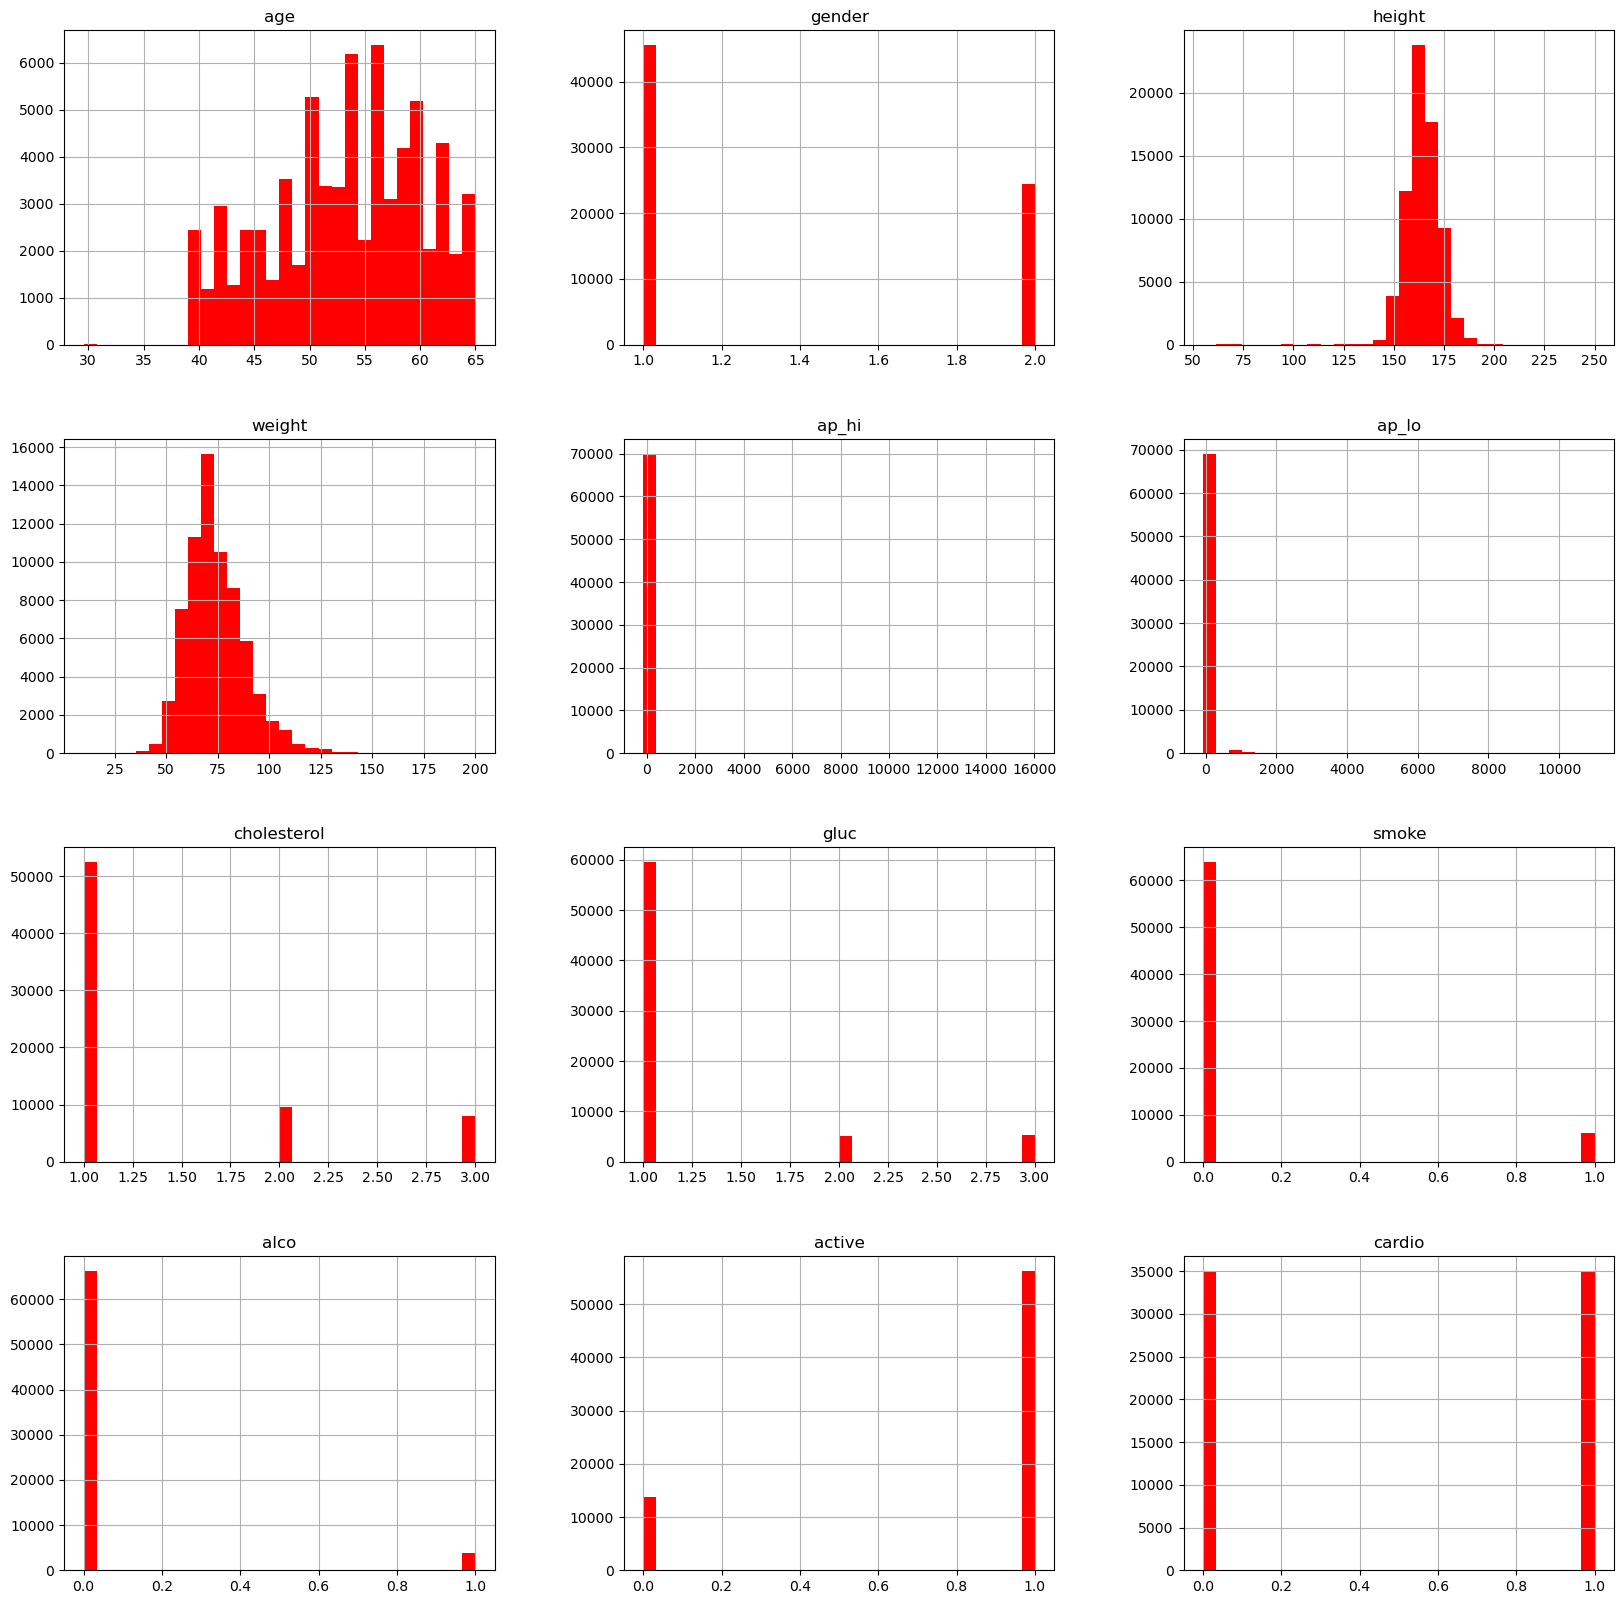

In [13]:
cardio_df.hist(bins = 30, figsize = (20,20), color = 'r')


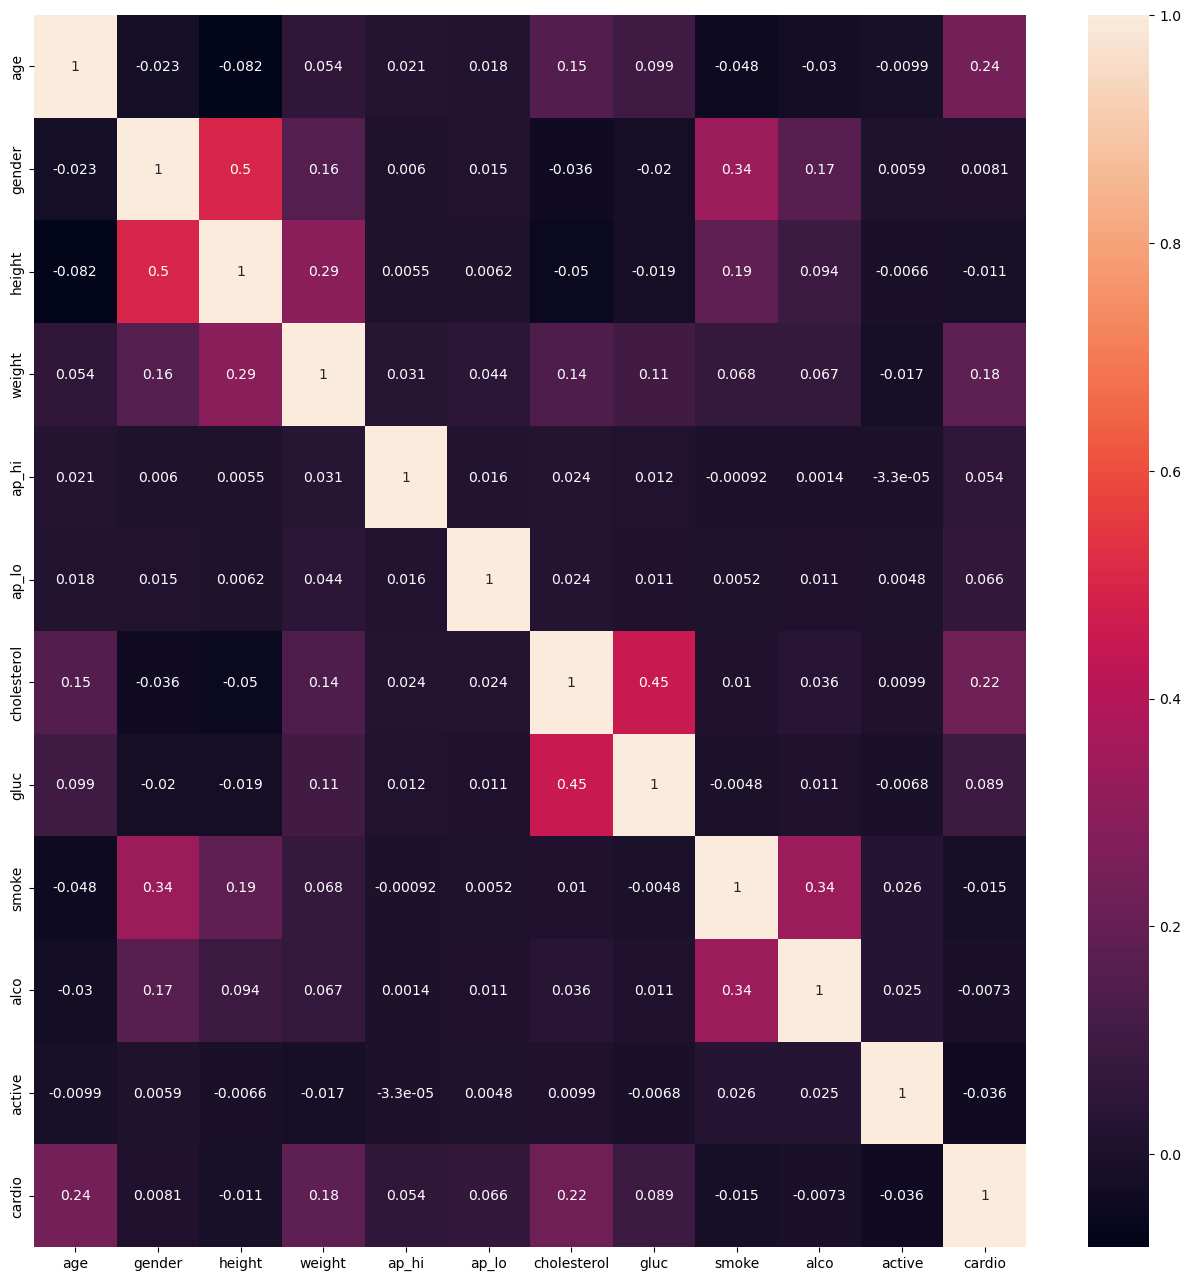

In [14]:
# Plotting the correlation matrix
corr_matrix = cardio_df.corr()
corr_matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

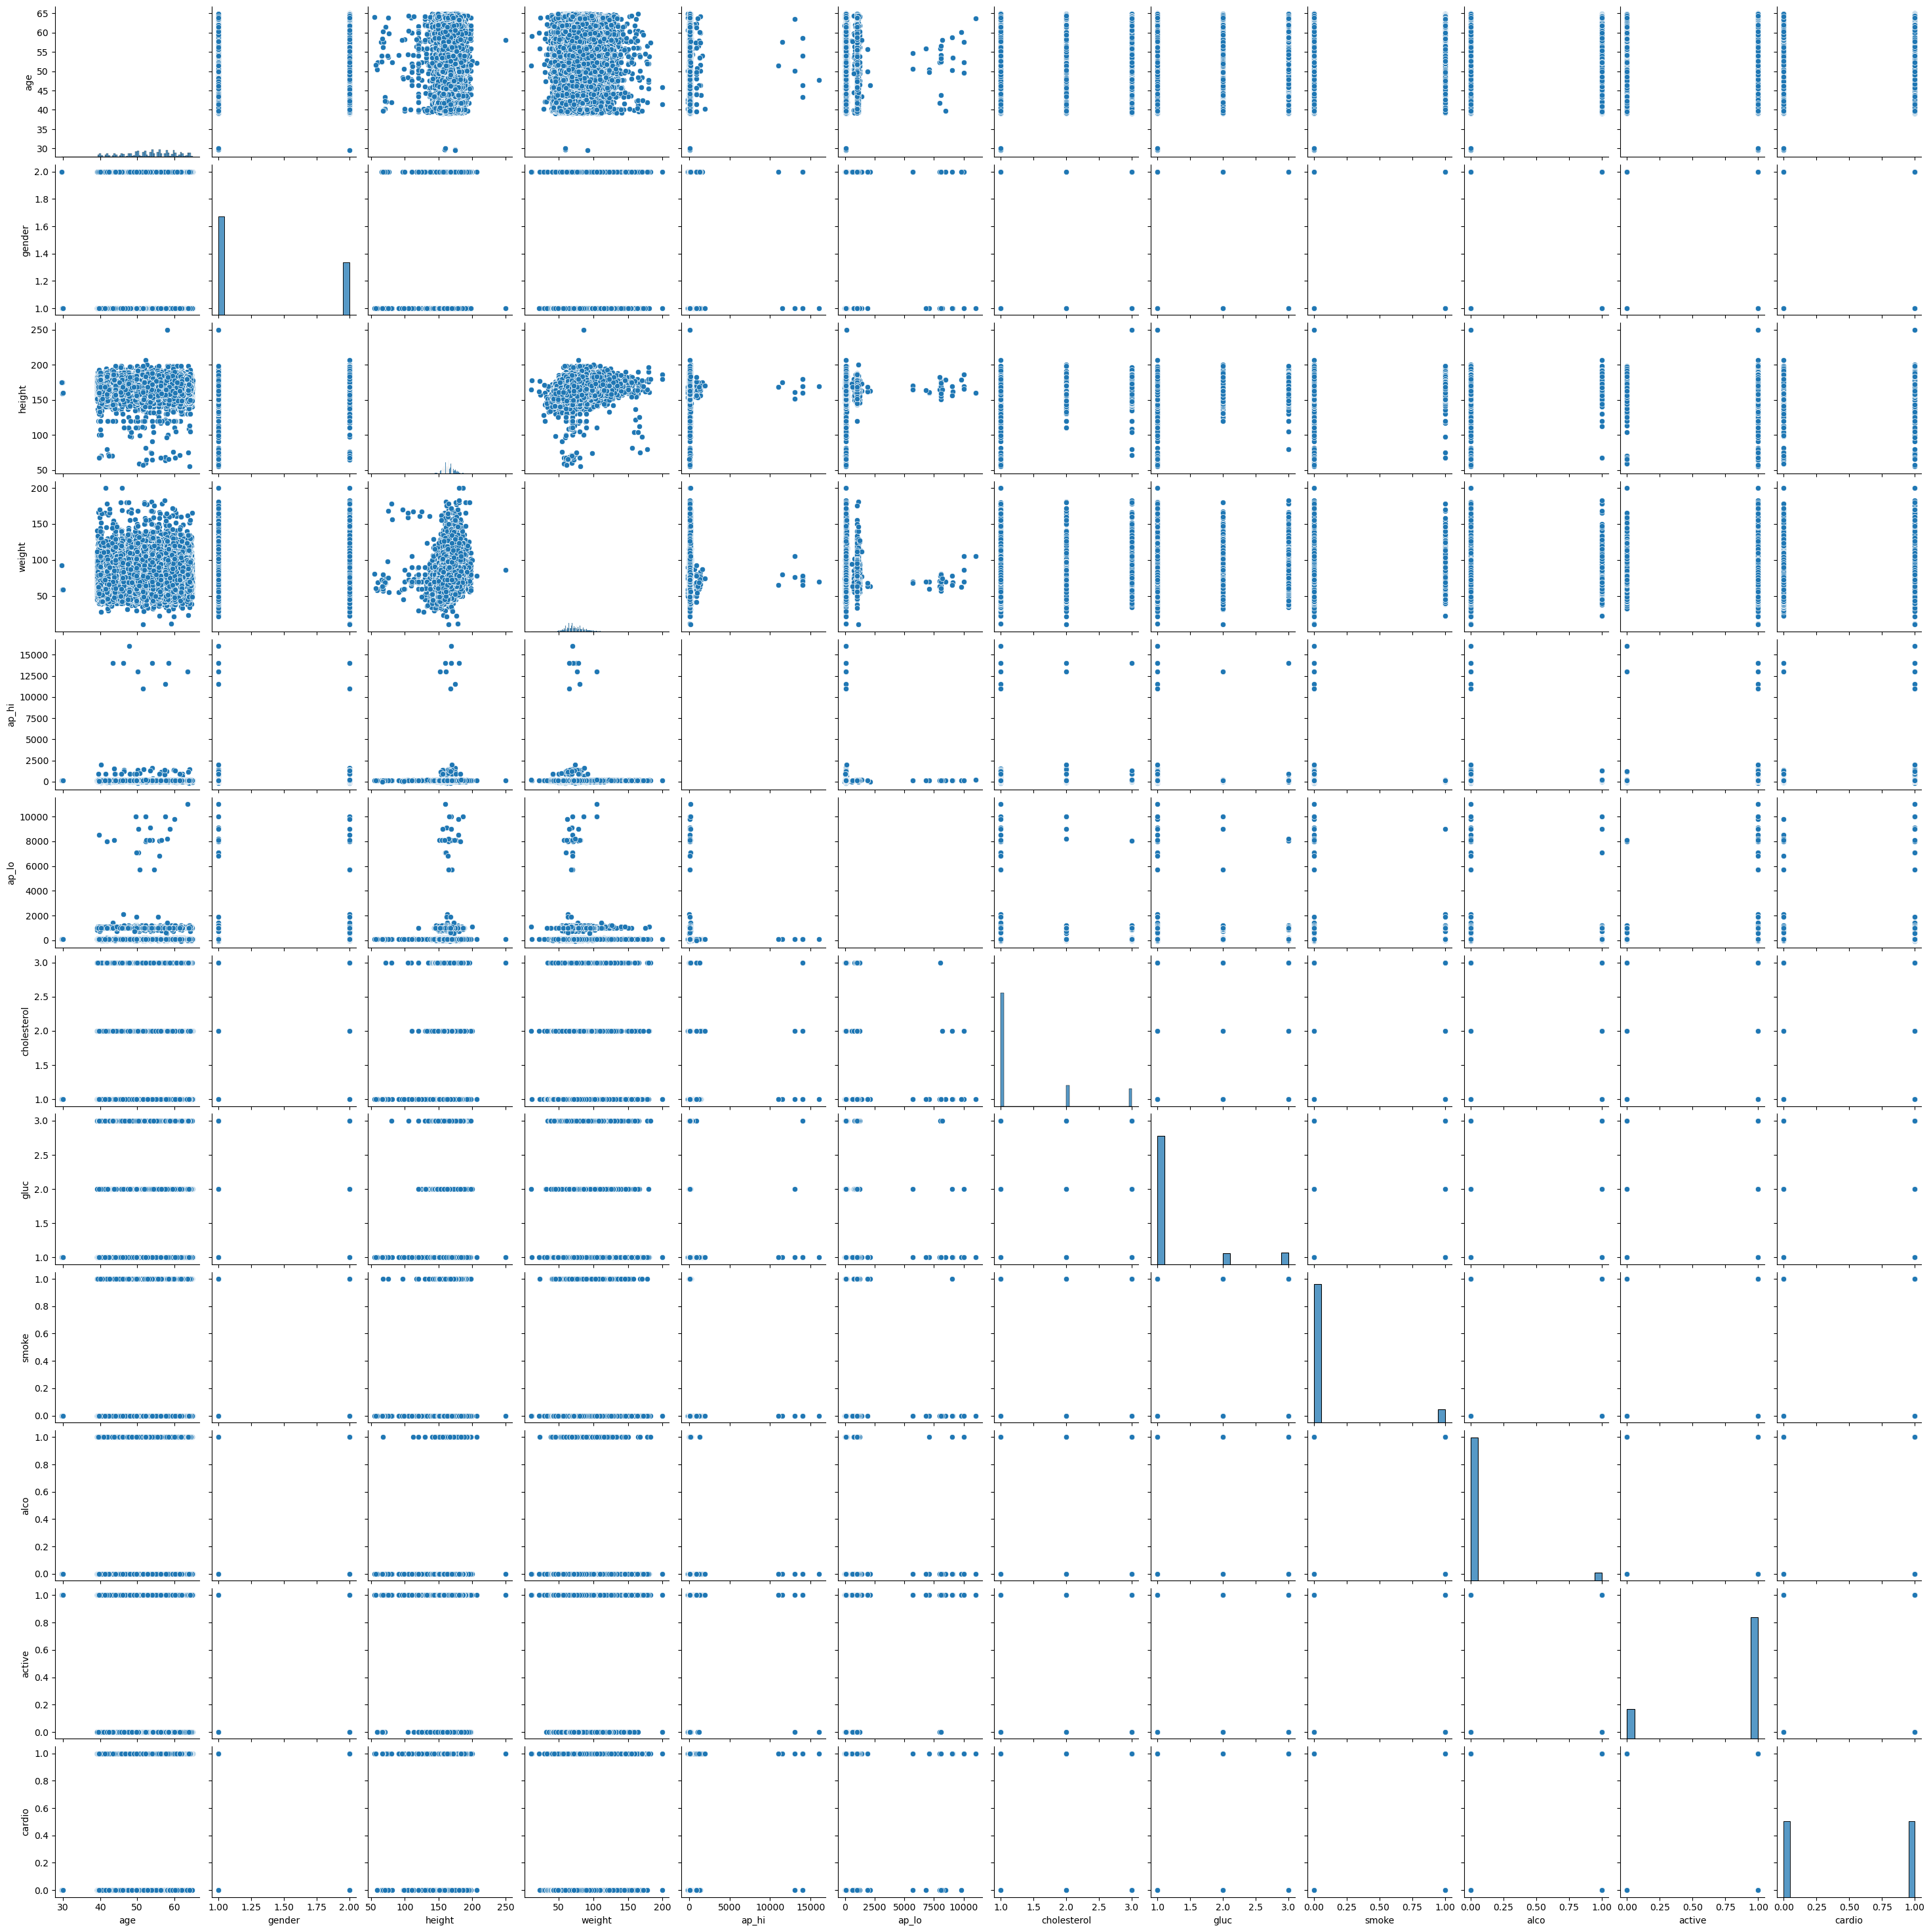

In [20]:
sns.pairplot(cardio_df)

# CREATE TRAINING AND TESTING DATASET, AND TRAIN AN XG-BOOST MODEL IN AWS SAGEMAKER

In [21]:
# Split the dataframe into target and features
y = cardio_df[['cardio']]
X = cardio_df.drop(columns =['cardio'])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
X.shape

(70000, 11)

In [24]:
y.shape

(70000, 1)

In [25]:
# Spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [26]:
X_train.shape

(49000, 11)

In [27]:
X_test.shape

(10500, 11)

In [28]:
X_val.shape

(10500, 11)

In [29]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame(X_train, columns=[f'{i}' for i in range(X_train.shape[1])])
train_data.insert(0, 'Target', y_train)

In [30]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,9,10
0,0,50.323288,1.0,150.0,50.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0
1,1,49.424658,2.0,162.0,65.0,130.0,70.0,1.0,1.0,0.0,0.0,0.0
2,1,63.460274,2.0,160.0,80.0,130.0,80.0,3.0,1.0,0.0,0.0,1.0
3,0,59.684932,1.0,156.0,54.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0
4,1,63.413699,2.0,165.0,68.0,170.0,100.0,1.0,1.0,0.0,0.0,1.0


In [31]:
val_data = pd.DataFrame(X_val, columns=[f'{i}' for i in range(X_val.shape[1])])
val_data.insert(0, 'Target', y_val)

In [32]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,9,10
0,1,61.498630,2.0,168.0,71.0,120.0,80.0,1.0,1.0,1.0,0.0,0.0
1,0,39.610959,1.0,166.0,63.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0
2,0,57.419178,1.0,154.0,61.0,120.0,80.0,1.0,1.0,1.0,0.0,0.0
3,1,54.038356,1.0,158.0,63.0,100.0,70.0,3.0,1.0,0.0,1.0,1.0
4,1,59.868493,2.0,161.0,87.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0


In [33]:
# Save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [34]:
import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

# S3 bucket and prefix that we want to use

bucket = "ml-lab-sagemaker"                     
prefix = 'XGBoost-Classifier-Cardio'
key = 'XGBoost-classifier'

# Create a sagmeaker execution role
role = sagemaker.get_execution_role()

print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
arn:aws:iam::588738589118:role/service-role/AmazonSageMaker-ExecutionRole-20241129T190553


In [35]:
# Read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://ml-lab-sagemaker/XGBoost-Classifier-Cardio/train/XGBoost-classifier


In [36]:
# Read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://ml-lab-sagemaker/XGBoost-Classifier-Cardio/validation/XGBoost-classifier


In [37]:
# Create output placeholder in S3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://ml-lab-sagemaker/XGBoost-Classifier-Cardio/output


In [38]:
# Obtain a reference to the XGBoost container image
# Version 1.0-1 better suits the general purpose compute (m4,m5)
# Reference: https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost.html

container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

In [81]:
Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                   role, 
                                                   instance_count = 1, 
                                                   instance_type = 'ml.m5.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)


Xgboost_classifier.set_hyperparameters(max_depth = 20,
                                       objective = 'multi:softmax',
                                       num_class = 2,
                                       eta = 0.1,
                                       num_round = 100)

In [82]:
# Creating "train", "validation" channels to train the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input,'validation': valid_input}


Xgboost_classifier.fit(data_channels)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-12-09-11-53-28-306


2024-12-09 11:53:28 Starting - Starting the training job...
2024-12-09 11:53:48 Starting - Preparing the instances for training...
2024-12-09 11:54:10 Downloading - Downloading input data...
2024-12-09 11:54:30 Downloading - Downloading the training image...
2024-12-09 11:55:10 Training - Training image download completed. Training in progress..[2024-12-09 11:55:21.546 ip-10-0-113-124.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delim

# DEPLOY MODEL TO PERFORM INFERENCE

In [83]:
predictor = Xgboost_classifier.deploy(initial_instance_count = 1, instance_type = "ml.m5.xlarge")

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-12-09-11-57-08-998
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-12-09-11-57-08-998
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-12-09-11-57-08-998


------!

In [84]:
from sagemaker.serializers import CSVSerializer

# Set the predictor to use CSV format for serializing input data before sending it to the deployed model
predictor.serializer = CSVSerializer()

In [85]:
predictions = predictor.predict(X_test)
predictions

b'0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.

In [86]:
# Decode the byte string to a regular string
decoded_predictions = predictions.decode('utf-8')

# Split the string by commas to get individual predictions
split_predictions = decoded_predictions.split(',')
    
# Convert the split strings into a numpy array of floats
predicted_values = np.array(split_predictions, dtype=np.float32)

# Reshaping the values to be (n,1)
predicted_values = predicted_values.reshape(-1,1)  

In [87]:
predicted_values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [88]:
# Plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

Precision = 0.7127460969814681
Recall = 0.7124966096052265
Accuracy = 0.7122857142857143


<Axes: >

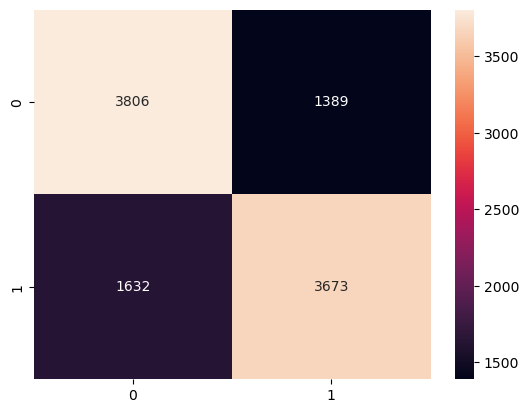

In [89]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [90]:
# Delete the end-point
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-12-09-11-57-08-998
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-12-09-11-57-08-998
